# Embeddings
- [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_annoy.html?highlight=load%20word2vec%20txt#work-with-google-s-word2vec-files) - **why do I need it????**
- [tokenizer](https://github.com/google/sentencepiece/blob/master/python/README.md)


## Load data (separate dataset)
- the 2008-2016 dataset 
- python language

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks 
from tensorflow.keras import optimizers

In [3]:
df = pd.read_csv("py_df.csv")

In [4]:
df = df.drop(columns=["round", "task", "solution", "file", "full_path", "Unnamed: 0.1", "Unnamed: 0", "lang"])

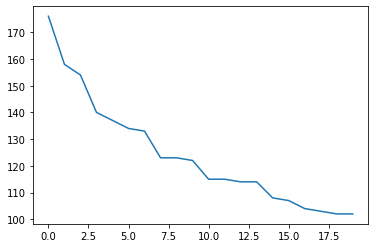

In [5]:
# let's collect 20 users with avg amount of files, which is around 100
# (enough files, but their difference amount is not sufficient)

plt.plot(np.array(df.username.value_counts())[:20])

In [6]:
users = df.username.value_counts()[:20].index
data_for_users = df[df.username.isin(users)]

In [7]:
data_for_users.head()

,year,username,flines
0,2008,mth,"#!/usr/bin/env python\n \n def comb(a, b):\n \..."
6,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""d.in"", ""r"")..."
7,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""b.in"", ""r"")..."
8,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""b.in"", ""r"")..."
21,2008,lidaobing,import sys\n \n def getints(ifile):\n retu...


In [8]:
# let's find avg file length (in chars)
data_for_users.flines.apply(lambda x: len(str(x))).describe()

count     2484.000000
mean      1912.701288
std       2093.527698
min        182.000000
25%        765.750000
50%       1337.500000
75%       2217.000000
max      38876.000000
Name: flines, dtype: float64

In [9]:
# let's find avg file length (in lines)
data_for_users["n_lines"] = data_for_users.flines.apply(lambda x: str(x).count("\n"))
data_for_users["n_lines"].describe()

/Users/alinabogdanova/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    2484.000000
mean       70.392512
std        60.719900
min         5.000000
25%        32.000000
50%        54.000000
75%        87.000000
max       615.000000
Name: n_lines, dtype: float64

In [10]:
# remove files with amount of lines not in [30, 100] -> decrease on 1/2
data_for_users = data_for_users[(data_for_users.n_lines>=30)&(data_for_users.n_lines<=100)]

In [11]:
data_for_users.n_lines.describe()

count    1470.000000
mean       58.061224
std        18.987375
min        30.000000
25%        41.000000
50%        56.000000
75%        72.000000
max       100.000000
Name: n_lines, dtype: float64

In [12]:
# remove authors with small amount of files
data_for_users.username.value_counts().describe()

count     20.000000
mean      73.500000
std       25.288858
min       26.000000
25%       62.500000
50%       66.500000
75%       86.000000
max      135.000000
Name: username, dtype: float64

In [13]:
tobe_saved = data_for_users.username.value_counts()[:75].index

In [14]:
data_for_users = data_for_users[data_for_users.username.isin(tobe_saved)]

In [15]:
data_for_users

,year,username,flines,n_lines
0,2008,mth,"#!/usr/bin/env python\n \n def comb(a, b):\n \...",41
6,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""d.in"", ""r"")...",50
21,2008,lidaobing,import sys\n \n def getints(ifile):\n retu...,48
23,2008,lidaobing,import sys\n import psyco\n psyco.full()\n imp...,85
28,2008,gizzywump,#!/usr/bin/env python\n \n import sys\n \n CAC...,38
...,...,...,...,...
154546,2016,kawasaki,import itertools\n \n T = int(raw_input())\n f...,40
155179,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,78
155180,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,35
155181,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,35


In [16]:
# let's find avg file length (in chars)
data_for_users["n_chars"] = data_for_users.flines.apply(lambda x: len(str(x)))

In [17]:
(data_for_users.n_chars/data_for_users.n_lines).describe()

count    1470.000000
mean       25.271375
std         5.449231
min        14.732558
25%        22.187500
50%        24.583333
75%        27.311111
max       101.256410
dtype: float64

In [18]:
# suspicious max value let's drop evetyrhing, highter then 102 and look, what's left
data_for_users["chars_per_line"] = data_for_users.n_chars/data_for_users.n_lines

In [19]:
data_for_users = data_for_users[data_for_users.chars_per_line<102]

In [42]:
# only two files were rmoved
data_for_users

,year,username,flines,n_lines,n_chars,chars_per_line,n_tokens
0,2008,mth,"#!/usr/bin/env python\n \n def comb(a, b):\n \...",41,870,21.219512,297
1,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""d.in"", ""r"")...",50,1040,20.800000,335
2,2008,lidaobing,import sys\n \n def getints(ifile):\n retu...,48,931,19.395833,250
3,2008,lidaobing,import sys\n import psyco\n psyco.full()\n imp...,85,1911,22.482353,480
4,2008,gizzywump,#!/usr/bin/env python\n \n import sys\n \n CAC...,38,885,23.289474,285
...,...,...,...,...,...,...,...
1465,2016,kawasaki,import itertools\n \n T = int(raw_input())\n f...,40,1580,39.500000,390
1466,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,78,1763,22.602564,443
1467,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,35,723,20.657143,192
1468,2016,Nooodles,### Google code jam 2016\n ### Online round 1C...,35,723,20.657143,192


In [43]:
data_for_users.describe()

,year,n_lines,n_chars,chars_per_line,n_tokens
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2012.268707,58.061224,1470.898639,25.271375,373.812925
std,2.428958,18.987375,581.424530,5.449231,144.689761
min,2008.000000,30.000000,508.000000,14.732558,134.000000
25%,2010.000000,41.000000,1032.250000,22.187500,267.250000
50%,2012.000000,56.000000,1378.000000,24.583333,342.000000
75%,2014.000000,72.000000,1794.500000,27.311111,468.000000
max,2016.000000,100.000000,3970.000000,101.256410,1323.000000


In [44]:
# let's leave the dataset, as it is for now
df = data_for_users

## Embedding

In [45]:
sp = spm.SentencePieceProcessor(model_file='embd/sentencepiece_bpe.model')
sp.encode('\tarr = [int(x) for x in str.split()]')

[6682, 14, 127, 184, 96091, 96097, 96090, 115, 419, 57, 420, 96084, 1300, 5382]

In [46]:
print(sp.decode(sp.encode('    arr = [int(x) for x in str.split()]')))

arr = [int(x) for x in str.split()]


In [47]:
# we loose layout features!

In [48]:
df.index = np.arange(len(df))

In [49]:
df["n_tokens"] = df.flines.apply(lambda x: len(sp.encode(x)))

In [50]:
df.describe()

,year,n_lines,n_chars,chars_per_line,n_tokens
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2012.268707,58.061224,1470.898639,25.271375,373.812925
std,2.428958,18.987375,581.424530,5.449231,144.689761
min,2008.000000,30.000000,508.000000,14.732558,134.000000
25%,2010.000000,41.000000,1032.250000,22.187500,267.250000
50%,2012.000000,56.000000,1378.000000,24.583333,342.000000
75%,2014.000000,72.000000,1794.500000,27.311111,468.000000
max,2016.000000,100.000000,3970.000000,101.256410,1323.000000


In [51]:
# rm files with amount of tokens less greater, then 500
df = df[df.n_tokens<=500]

In [52]:
df.describe()

,year,n_lines,n_chars,chars_per_line,n_tokens
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.00000
mean,2012.242298,52.634471,1277.002498,24.452478,322.37219
std,2.424956,15.698103,398.066095,4.166353,89.37734
min,2008.000000,30.000000,508.000000,14.732558,134.00000
25%,2010.000000,40.000000,961.000000,21.773333,253.00000
50%,2012.000000,51.000000,1267.000000,23.841270,320.00000
75%,2014.000000,62.000000,1543.000000,26.575000,387.00000
max,2016.000000,99.000000,2966.000000,43.633333,500.00000


In [53]:
# let's hope, that min = 21 is ok
df.username.value_counts()

EricStansifer    124
lidaobing         98
RalfKistner       84
gizzywump         75
kmod              71
mth               66
Martial           64
Sp3000            63
raja.baz          58
Fizu              58
linguo            57
zibada            55
zli               52
Nooodles          51
kawasaki          50
graygrass         46
eMBe              42
tanriol           34
bigOnion          32
festony           21
Name: username, dtype: int64

In [54]:
df["tokens"] = df.flines.apply(lambda x: sp.encode(x))

/Users/alinabogdanova/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df.head()

,year,username,flines,n_lines,n_chars,chars_per_line,n_tokens,tokens
0,2008,mth,"#!/usr/bin/env python\n \n def comb(a, b):\n \...",41,870,21.219512,297,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 6..."
1,2008,RalfKistner,"#!/usr/bin/python\n \n fin = open(""d.in"", ""r"")...",50,1040,20.800000,335,"[3238, 2785, 96124, 1119, 96124, 1796, 3014, 1..."
2,2008,lidaobing,import sys\n \n def getints(ifile):\n retu...,48,931,19.395833,250,"[138, 1149, 63, 398, 7686, 96091, 96073, 252, ..."
3,2008,lidaobing,import sys\n import psyco\n psyco.full()\n imp...,85,1911,22.482353,480,"[138, 1149, 138, 20653, 62, 20653, 62, 96084, ..."
4,2008,gizzywump,#!/usr/bin/env python\n \n import sys\n \n CAC...,38,885,23.289474,285,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 1..."


In [56]:
dataset = df[["username", "tokens"]]

In [57]:
dataset

,username,tokens
0,mth,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 6..."
1,RalfKistner,"[3238, 2785, 96124, 1119, 96124, 1796, 3014, 1..."
2,lidaobing,"[138, 1149, 63, 398, 7686, 96091, 96073, 252, ..."
3,lidaobing,"[138, 1149, 138, 20653, 62, 20653, 62, 96084, ..."
4,gizzywump,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 1..."
...,...,...
1465,kawasaki,"[138, 6912, 111, 14, 655, 96091, 1032, 96077, ..."
1466,Nooodles,"[5059, 9337, 1174, 1250, 144, 9647, 5059, 4474..."
1467,Nooodles,"[5059, 9337, 1174, 1250, 144, 9647, 5059, 4474..."
1468,Nooodles,"[5059, 9337, 1174, 1250, 144, 9647, 5059, 4474..."


## Load data
Lib selected - tensorflow + keras

### Some small notes for future
Tensorflow supports python 3.8 as max version. The issue arises on latest Ubuntu/max os-es, when the default python version is 3.9.

What was done on MAC-OS-Big-Sur to solve that issue.
- [pyenv](https://github.com/pyenv/pyenv) installed
```bash
>> brew update
>> brew install pyenv
...
```
- python 3.7 installation
```
>> brew install python@3.7
```
- pyenv added python 3.7
```
>> pyenv install 3.7.10
>> pyenv loacal 3.7.10
```
- create [myenv](https://www.tensorflow.org/install/pip#2.-create-a-virtual-environment-recommended)
```
>> python3.7 -m venv myenv
>> source myenv/bin/activate.fish
```
- solution of the final problem - **UPGRADE PIP**
- install tensorflow
```
(myenv)>> pip install --upgrade tensorflow
```

In [58]:
le = LabelEncoder()
dataset.username = le.fit_transform(dataset.username)

/Users/alinabogdanova/Documents/workspace/research/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
# shuffle dataset
dataset = dataset.sample(frac = 1) 
dataset

,username,tokens
338,1,"[138, 1174, 14209, 138, 3764, 299, 31915, 9613..."
433,6,"[3014, 14, 1388, 429, 96079, 15003, 4398, 9612..."
1452,2,"[138, 1149, 156, 4159, 138, 8485, 46, 1149, 96..."
1125,4,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 9..."
654,15,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 1..."
...,...,...
1114,14,"[63, 6803, 96091, 5, 1365, 45, 121, 2294, 9609..."
1226,19,"[138, 1149, 63, 5585, 96091, 96098, 45, 121, 1..."
1061,5,"[156, 32024, 138, 58076, 20094, 14, 1388, 192,..."
947,2,"[138, 1149, 1149, 96084, 123, 61427, 65591, 12..."


In [60]:
def rsh(x):
    arr = np.array(x)
    arr.resize(500)
    return list(arr)

dataset.tokens = dataset.tokens.apply(rsh)

In [61]:
dataset

,username,tokens
338,1,"[138, 1174, 14209, 138, 3764, 299, 31915, 9613..."
433,6,"[3014, 14, 1388, 429, 96079, 15003, 4398, 9612..."
1452,2,"[138, 1149, 156, 4159, 138, 8485, 46, 1149, 96..."
1125,4,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 9..."
654,15,"[3238, 2785, 96124, 1119, 96124, 1376, 1804, 1..."
...,...,...
1114,14,"[63, 6803, 96091, 5, 1365, 45, 121, 2294, 9609..."
1226,19,"[138, 1149, 63, 5585, 96091, 96098, 45, 121, 1..."
1061,5,"[156, 32024, 138, 58076, 20094, 14, 1388, 192,..."
947,2,"[138, 1149, 1149, 96084, 123, 61427, 65591, 12..."


In [62]:
X = dataset.tokens.values
X = np.array(list(X))
X.shape

(1201, 500)

In [70]:
X = X.reshape((-1, 500, 1))
y = np.array(dataset.username)

ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1, 1))
y = y.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(900, 500, 1)

### Structure of the model
1. CNN:
- ks = 50 (function - level)
- ks = 10 (line2 - level)
- ks = 5 (lene - level)
2. Linear ReLU 
3. softmax 75

> important note `tanh` activation increases accuracy from 11% to 60% ontraining (50% of test accuracy)
>
> `linear` function reaches up to 61% of test accuracy

In [251]:
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(150, 10, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 491, 150)          1650      
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 61, 150)           0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 9150)              0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 9150)              0         
_________________________________________________________________
dense_117 (Dense)            (None, 64)                585664    
_________________________________________________________________
dropout_126 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 20)              

In [252]:
optimizer = optimizers.Adam(0.1)
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_delta=0.000001, verbouse=1)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [253]:
epochs = 100
batch_size = 20
history = model.fit(x=X_train, y=y_train, epochs = epochs, 
                    validation_data = (X_test,y_test),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=2, 
                    callbacks=[lr_schedule])

Epoch 1/100
45/45 - 1s - loss: 22156278.0000 - accuracy: 0.0967 - val_loss: 17556326.0000 - val_accuracy: 0.1495
Epoch 2/100
45/45 - 1s - loss: 23150838.0000 - accuracy: 0.1878 - val_loss: 21010062.0000 - val_accuracy: 0.2425
Epoch 3/100
45/45 - 1s - loss: 41001996.0000 - accuracy: 0.1944 - val_loss: 40253820.0000 - val_accuracy: 0.2292
Epoch 4/100
45/45 - 0s - loss: 69739712.0000 - accuracy: 0.2467 - val_loss: 70094304.0000 - val_accuracy: 0.3090
Epoch 5/100
45/45 - 1s - loss: 143315232.0000 - accuracy: 0.2422 - val_loss: 118978080.0000 - val_accuracy: 0.3189
Epoch 6/100
45/45 - 1s - loss: 209620480.0000 - accuracy: 0.2867 - val_loss: 220100160.0000 - val_accuracy: 0.2857
Epoch 7/100
45/45 - 0s - loss: 255033616.0000 - accuracy: 0.3422 - val_loss: 202299968.0000 - val_accuracy: 0.3987
Epoch 8/100
45/45 - 0s - loss: 252094416.0000 - accuracy: 0.4289 - val_loss: 267818304.0000 - val_accuracy: 0.4053
Epoch 9/100
45/45 - 0s - loss: 291257504.0000 - accuracy: 0.4544 - val_loss: 369596096.0

In [255]:
model.save('model.h5')

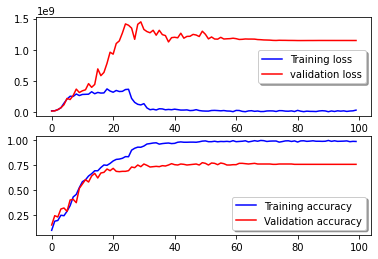

In [256]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### 68.77% test accuracy

```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(100, 32, activation="linear"))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### up to 70% (converges to 69.044) test accuracy
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(100, 16, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### converges to 70.01% test accuracy
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(100, 8, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### 72% of test accuracy
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(150, 8, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=6))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### confident 73%
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(128, 16, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### up to 74%
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(128, 16, activation="linear", strides=2)) # a few lines
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

#### converges to 75% test accuracy (up to 77%)
```python
model = keras.Sequential()
model.add(keras.Input(shape=(500, 1)))  # 250x250 RGB images
model.add(layers.Conv1D(150, 10, activation="linear")) # a few lines
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="linear"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation="softmax"))
model.summary()
```

- Also the structures with 2 Convolutional layers were tested (up to 50% accuracy)
- Avg Pooling works poarly due to the fact, that the initial data is not normalized

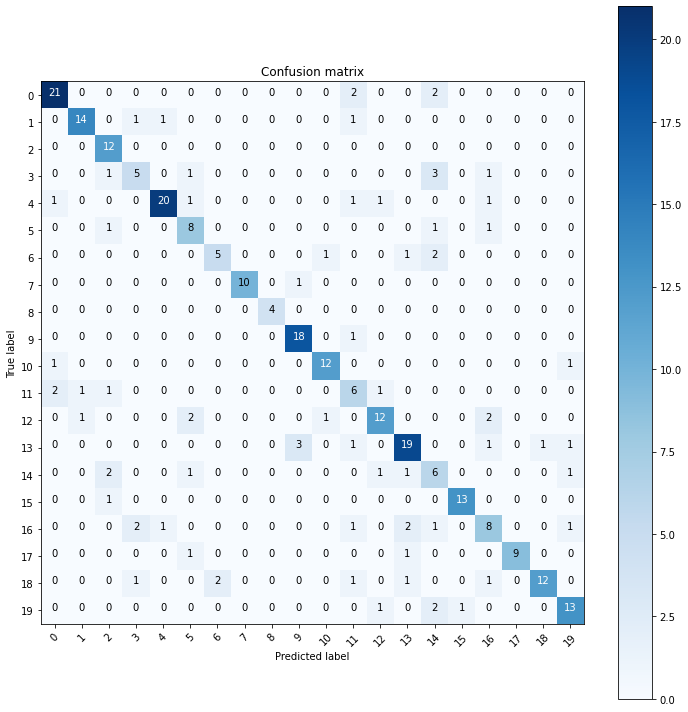

In [254]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(20))